# Problema

Predecir el tipo de flor

# El set de datos

Número de Instancias:

El conjunto de datos Iris consta de 150 muestras de flores Iris con 4 características cada una.

Características:

* Longitud del sépalo (sepal length)
* Ancho del sépalo (sepal width)
* Longitud del pétalo (petal length)
* Ancho del pétalo (petal width)

Clases o Etiquetas:

* Setosa
* Versicolor
* Virginica



In [1]:
# imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# Objetivo

Generar un model de clasificación capaz de predecir la clase de flor en función de las carácterísticas del dataset

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de clasificación

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

Exploración de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.00000

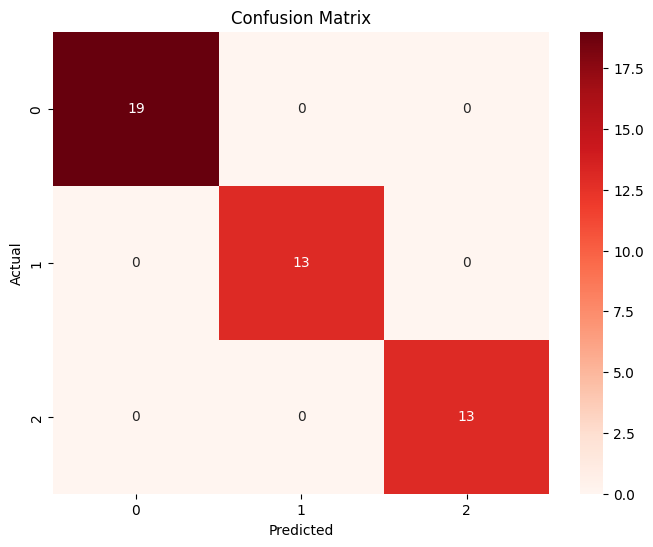

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

#DataFrame para datos y el objetivo
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

print("Exploración de datos:")
print(df.head())
print(df.describe())
print(df.info())

# Divide los datos en características (X) y variable objetivo (y)
X = df.drop(columns=["target"])
y = df["target"]

#Selección de modelos
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escala las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializa modelos
random_forest = RandomForestClassifier()
svm = SVC()
logistic_regression = LogisticRegression()

#Compara los tres modelos
models = [
    ("Random Forest", random_forest),
    ("Support Vector Machine", svm),
    ("Logistic Regression", logistic_regression)
]

for name, model in models:
    # Entrena el modelo
    model.fit(X_train_scaled, y_train)
    # Evalúa el modelo
    accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
    print(f"{name} - Accuracy: {accuracy}")

#Ensemble
ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train_scaled, y_train)
ensemble_accuracy = accuracy_score(y_test, ensemble.predict(X_test_scaled))
print(f"Ensemble - Accuracy: {ensemble_accuracy}")

#Métricas
best_model = ensemble
y_pred = best_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Conclusiones

Tras observar los diferentes resultados que proporcionan los modelos, se obtiene que:

- El mejor modelo a usar coincide en varios de los mismos, por lo que podría decirse que **el mejor es cualquiera de ellos**, *Logistic Regression*, por ejemplo.
- La **precisión** de las mismas es perfecta, de 1.0.
- Y ofrece la **matriz de confusión** representada arriba: En la primera fila, tenemos la clase 0. De las instancias que de la clase 0, todas, las 19, fueron correctamente clasificadas como clase 0, lo que indica un rendimiento perfecto para esta clase. Este mismo análisis se repite tanto en la segunda como en la tercera clase, dónde, únicamente reemplazándose por 13, ambas, convergen en el mismo resultado.